# Install Requirements

In [1]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 686kB 21.0MB/s ta 0:00:01
  Running setup.py bdist_wheel for visdom ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Running setup.py bdist_wheel for torchfile ... done
  Stored in directory: /home/ec2-user/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile
fastai 1.0.55 requires nvidia-ml-py3, which is not installed.
thinc 6.12.1 has requirement msgpack<0.6.0,>=0.5.6, but you'll have msgpack 0.6.0 which is incompatible.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import util.util as util
import os, time
from train import train
from test import test

# Get Data

In [3]:
!bash ./datasets/download_cyclegan_dataset.sh maps

Specified [maps]
for details.

--2019-11-15 14:38:21--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/maps.zip
Resolving people.eecs.berkeley.edu (people.eecs.berkeley.edu)... 128.32.189.73
Connecting to people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1476754427 (1.4G) [application/zip]
Saving to: ‘./datasets/maps.zip’

./datasets/maps.zip   0%[                    ] 328.00K   261KB/s               ^C


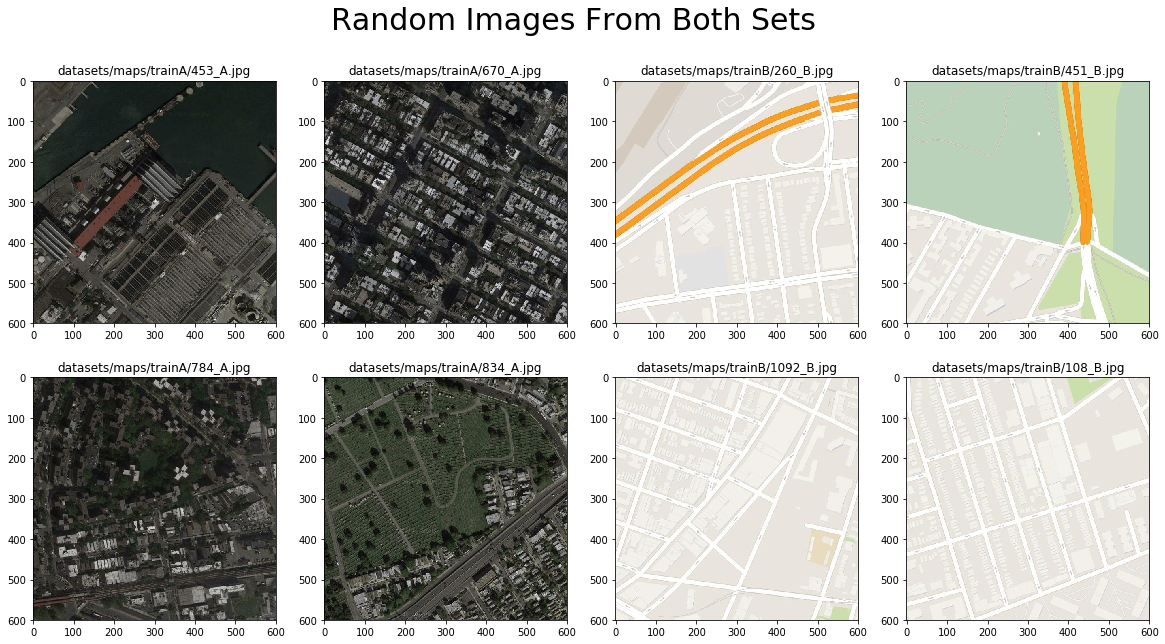

In [3]:
util.visualize_unpaired("datasets/maps", kind="train")

# Train Model 

In [7]:
train(['--dataroot=./datasets/maps','--name=maps_cyclegan','--model=cycle_gan','--checkpoints_dir=./model-checkpoints','--update_html_freq=100','--print_freq=100','--display_freq=100','--display_id=-1','--save_latest_freq=100'])

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./model-checkpoints           	[default: ./checkpoints]
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/maps               	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 100                           	[default: 400]
               display_id: -1                            	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                   

KeyboardInterrupt: 

# Test Model

In [4]:
start_time = time.time()
test(['--dataroot=./example-image','--name=maps_cyclegan','--model=test','--checkpoints_dir=./model-checkpoints','--gpu_ids=-1','--no_dropout','--preprocess=none'])
print("Time: {} Seconds".format(time.time()-start_time))

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./model-checkpoints           	[default: ./checkpoints]
                crop_size: 256                           
                 dataroot: ./example-image               	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            	[default: 0]
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                lo